My intented reader is someone who has experience with pandas. This is not an introduction to pandas. There are many great resources for that. In particular, I recommend [Greg Reda](https://twitter.com/gjreda)'s [3-part introduction](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/), especially if you're familiar with SQL. Of course, there's the pandas [documentation](http://pandas.pydata.org/) itself. I gave [a talk](https://www.youtube.com/watch?v=otCriSKVV_8) at PyData Seattle targeted as an introduction. Wes McKinney's [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) is still the goto book. Jake VanderPlas's [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do), in early release, is great too.

With all those resources (and many more that I've slighted by omitting), why write another? Surely the law of dimenishing returns is kicking in by now.
Still, I thought there was room for a guide that is update to date (as of March 2016) and emphasizes idiomatic pandas code (code that is *pandorable*).

We'll be working with [flight delay data](http://www.transtats.bts.gov/databases.asp?Mode_ID=1&Mode_Desc=Aviation&Subject_ID2=0) from the BTS (R users can install Hadley's [NYCFlights](https://github.com/hadley/nycflights13) dataset for similar data).

Protip: In the chrome dev-tools go to the Network tab, right-click the request and
"Copy as cURL". Paste that into http://curl.trillworks.com/ to get the request code.

In [1]:
import zipfile

import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
headers = {
    'Pragma': 'no-cache',
    'Origin': 'http://www.transtats.bts.gov',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) '
                   'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36'),
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'no-cache',
    'Referer': 'http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time',
    'Connection': 'keep-alive',
    'DNT': '1',
}
# Sorry about the long url
data = 'UserTableName=On_Time_Performance&DBShortName=On_Time&RawDataTable=T_ONTIME&sqlstr=+SELECT+FL_DATE%2CUNIQUE_CARRIER%2CAIRLINE_ID%2CTAIL_NUM%2CFL_NUM%2CORIGIN_AIRPORT_ID%2CORIGIN_AIRPORT_SEQ_ID%2CORIGIN_CITY_MARKET_ID%2CORIGIN%2CORIGIN_CITY_NAME%2CORIGIN_STATE_NM%2CDEST_AIRPORT_ID%2CDEST_AIRPORT_SEQ_ID%2CDEST_CITY_MARKET_ID%2CDEST%2CDEST_CITY_NAME%2CDEST_STATE_NM%2CCRS_DEP_TIME%2CDEP_TIME%2CDEP_DELAY%2CTAXI_OUT%2CWHEELS_OFF%2CWHEELS_ON%2CTAXI_IN%2CCRS_ARR_TIME%2CARR_TIME%2CARR_DELAY%2CCANCELLED%2CCANCELLATION_CODE%2CDIVERTED%2CDISTANCE%2CCARRIER_DELAY%2CWEATHER_DELAY%2CNAS_DELAY%2CSECURITY_DELAY%2CLATE_AIRCRAFT_DELAY+FROM++T_ONTIME+WHERE+Month+%3D1+AND+YEAR%3D2014&varlist=FL_DATE%2CUNIQUE_CARRIER%2CAIRLINE_ID%2CTAIL_NUM%2CFL_NUM%2CORIGIN_AIRPORT_ID%2CORIGIN_AIRPORT_SEQ_ID%2CORIGIN_CITY_MARKET_ID%2CORIGIN%2CORIGIN_CITY_NAME%2CORIGIN_STATE_NM%2CDEST_AIRPORT_ID%2CDEST_AIRPORT_SEQ_ID%2CDEST_CITY_MARKET_ID%2CDEST%2CDEST_CITY_NAME%2CDEST_STATE_NM%2CCRS_DEP_TIME%2CDEP_TIME%2CDEP_DELAY%2CTAXI_OUT%2CWHEELS_OFF%2CWHEELS_ON%2CTAXI_IN%2CCRS_ARR_TIME%2CARR_TIME%2CARR_DELAY%2CCANCELLED%2CCANCELLATION_CODE%2CDIVERTED%2CDISTANCE%2CCARRIER_DELAY%2CWEATHER_DELAY%2CNAS_DELAY%2CSECURITY_DELAY%2CLATE_AIRCRAFT_DELAY&grouplist=&suml=&sumRegion=&filter1=title%3D&filter2=title%3D&geo=All%A0&time=January&timename=Month&GEOGRAPHY=All&XYEAR=2014&FREQUENCY=1&VarDesc=Year&VarType=Num&VarDesc=Quarter&VarType=Num&VarDesc=Month&VarType=Num&VarDesc=DayofMonth&VarType=Num&VarDesc=DayOfWeek&VarType=Num&VarName=FL_DATE&VarDesc=FlightDate&VarType=Char&VarName=UNIQUE_CARRIER&VarDesc=UniqueCarrier&VarType=Char&VarName=AIRLINE_ID&VarDesc=AirlineID&VarType=Num&VarDesc=Carrier&VarType=Char&VarName=TAIL_NUM&VarDesc=TailNum&VarType=Char&VarName=FL_NUM&VarDesc=FlightNum&VarType=Char&VarName=ORIGIN_AIRPORT_ID&VarDesc=OriginAirportID&VarType=Num&VarName=ORIGIN_AIRPORT_SEQ_ID&VarDesc=OriginAirportSeqID&VarType=Num&VarName=ORIGIN_CITY_MARKET_ID&VarDesc=OriginCityMarketID&VarType=Num&VarName=ORIGIN&VarDesc=Origin&VarType=Char&VarName=ORIGIN_CITY_NAME&VarDesc=OriginCityName&VarType=Char&VarDesc=OriginState&VarType=Char&VarDesc=OriginStateFips&VarType=Char&VarName=ORIGIN_STATE_NM&VarDesc=OriginStateName&VarType=Char&VarDesc=OriginWac&VarType=Num&VarName=DEST_AIRPORT_ID&VarDesc=DestAirportID&VarType=Num&VarName=DEST_AIRPORT_SEQ_ID&VarDesc=DestAirportSeqID&VarType=Num&VarName=DEST_CITY_MARKET_ID&VarDesc=DestCityMarketID&VarType=Num&VarName=DEST&VarDesc=Dest&VarType=Char&VarName=DEST_CITY_NAME&VarDesc=DestCityName&VarType=Char&VarDesc=DestState&VarType=Char&VarDesc=DestStateFips&VarType=Char&VarName=DEST_STATE_NM&VarDesc=DestStateName&VarType=Char&VarDesc=DestWac&VarType=Num&VarName=CRS_DEP_TIME&VarDesc=CRSDepTime&VarType=Char&VarName=DEP_TIME&VarDesc=DepTime&VarType=Char&VarName=DEP_DELAY&VarDesc=DepDelay&VarType=Num&VarDesc=DepDelayMinutes&VarType=Num&VarDesc=DepDel15&VarType=Num&VarDesc=DepartureDelayGroups&VarType=Num&VarDesc=DepTimeBlk&VarType=Char&VarName=TAXI_OUT&VarDesc=TaxiOut&VarType=Num&VarName=WHEELS_OFF&VarDesc=WheelsOff&VarType=Char&VarName=WHEELS_ON&VarDesc=WheelsOn&VarType=Char&VarName=TAXI_IN&VarDesc=TaxiIn&VarType=Num&VarName=CRS_ARR_TIME&VarDesc=CRSArrTime&VarType=Char&VarName=ARR_TIME&VarDesc=ArrTime&VarType=Char&VarName=ARR_DELAY&VarDesc=ArrDelay&VarType=Num&VarDesc=ArrDelayMinutes&VarType=Num&VarDesc=ArrDel15&VarType=Num&VarDesc=ArrivalDelayGroups&VarType=Num&VarDesc=ArrTimeBlk&VarType=Char&VarName=CANCELLED&VarDesc=Cancelled&VarType=Num&VarName=CANCELLATION_CODE&VarDesc=CancellationCode&VarType=Char&VarName=DIVERTED&VarDesc=Diverted&VarType=Num&VarDesc=CRSElapsedTime&VarType=Num&VarDesc=ActualElapsedTime&VarType=Num&VarDesc=AirTime&VarType=Num&VarDesc=Flights&VarType=Num&VarName=DISTANCE&VarDesc=Distance&VarType=Num&VarDesc=DistanceGroup&VarType=Num&VarName=CARRIER_DELAY&VarDesc=CarrierDelay&VarType=Num&VarName=WEATHER_DELAY&VarDesc=WeatherDelay&VarType=Num&VarName=NAS_DELAY&VarDesc=NASDelay&VarType=Num&VarName=SECURITY_DELAY&VarDesc=SecurityDelay&VarType=Num&VarName=LATE_AIRCRAFT_DELAY&VarDesc=LateAircraftDelay&VarType=Num&VarDesc=FirstDepTime&VarType=Char&VarDesc=TotalAddGTime&VarType=Num&VarDesc=LongestAddGTime&VarType=Num&VarDesc=DivAirportLandings&VarType=Num&VarDesc=DivReachedDest&VarType=Num&VarDesc=DivActualElapsedTime&VarType=Num&VarDesc=DivArrDelay&VarType=Num&VarDesc=DivDistance&VarType=Num&VarDesc=Div1Airport&VarType=Char&VarDesc=Div1AirportID&VarType=Num&VarDesc=Div1AirportSeqID&VarType=Num&VarDesc=Div1WheelsOn&VarType=Char&VarDesc=Div1TotalGTime&VarType=Num&VarDesc=Div1LongestGTime&VarType=Num&VarDesc=Div1WheelsOff&VarType=Char&VarDesc=Div1TailNum&VarType=Char&VarDesc=Div2Airport&VarType=Char&VarDesc=Div2AirportID&VarType=Num&VarDesc=Div2AirportSeqID&VarType=Num&VarDesc=Div2WheelsOn&VarType=Char&VarDesc=Div2TotalGTime&VarType=Num&VarDesc=Div2LongestGTime&VarType=Num&VarDesc=Div2WheelsOff&VarType=Char&VarDesc=Div2TailNum&VarType=Char&VarDesc=Div3Airport&VarType=Char&VarDesc=Div3AirportID&VarType=Num&VarDesc=Div3AirportSeqID&VarType=Num&VarDesc=Div3WheelsOn&VarType=Char&VarDesc=Div3TotalGTime&VarType=Num&VarDesc=Div3LongestGTime&VarType=Num&VarDesc=Div3WheelsOff&VarType=Char&VarDesc=Div3TailNum&VarType=Char&VarDesc=Div4Airport&VarType=Char&VarDesc=Div4AirportID&VarType=Num&VarDesc=Div4AirportSeqID&VarType=Num&VarDesc=Div4WheelsOn&VarType=Char&VarDesc=Div4TotalGTime&VarType=Num&VarDesc=Div4LongestGTime&VarType=Num&VarDesc=Div4WheelsOff&VarType=Char&VarDesc=Div4TailNum&VarType=Char&VarDesc=Div5Airport&VarType=Char&VarDesc=Div5AirportID&VarType=Num&VarDesc=Div5AirportSeqID&VarType=Num&VarDesc=Div5WheelsOn&VarType=Char&VarDesc=Div5TotalGTime&VarType=Num&VarDesc=Div5LongestGTime&VarType=Num&VarDesc=Div5WheelsOff&VarType=Char&VarDesc=Div5TailNum&VarType=Char'

r = requests.post('http://www.transtats.bts.gov/DownLoad_Table.asp?Table_ID=236&Has_Group=3&Is_Zipped=0',
                  headers=headers, data=data, stream=True)

with open("flights.csv", 'wb') as f:
    for chunk in r.iter_content(chunk_size=1024): 
        if chunk:
            f.write(chunk)

In [5]:
zf = zipfile.ZipFile("flights.csv.zip")
filename = zf.filelist[0].filename
fp = zf.extract(filename)
df = pd.read_csv(fp, parse_dates=["FL_DATE"]).rename(columns=str.lower)

In [6]:
df.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,...,cancelled,cancellation_code,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 36
0,2014-01-01,AA,19805,N338AA,1,12478,1247802,31703,JFK,"New York, NY",...,0.0,NaN,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,19805,N339AA,2,12892,1289203,32575,LAX,"Los Angeles, CA",...,0.0,NaN,0.0,2475.0,111.0,0.0,0.0,0.0,0.0,NaN
2,2014-01-01,AA,19805,N335AA,3,12478,1247802,31703,JFK,"New York, NY",...,0.0,NaN,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,AA,19805,N367AA,5,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",...,0.0,NaN,0.0,3784.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-01,AA,19805,N364AA,6,13830,1383002,33830,OGG,"Kahului, HI",...,0.0,NaN,0.0,3711.0,NaN,NaN,NaN,NaN,NaN,NaN


## Slicing

Or, *explicit is better than implicit*.

By my count, 7 of the top-15 voted pandas questions on [Stackoverflow](http://stackoverflow.com/questions/tagged/pandas?sort=votes&pageSize=15) are about slicing. This seems as good a place as any to start.

Brief history digression: For years the preferred method for row and/or column selection was `.ix`.

In [7]:
df.ix[10:15, ['fl_date', 'tail_num']]

,fl_date,tail_num
10,2014-01-01,N3LGAA
11,2014-01-01,N368AA
12,2014-01-01,N3DDAA
13,2014-01-01,N332AA
14,2014-01-01,N327AA
15,2014-01-01,N3LBAA


However this simple little operation hides some complexity. What if, rather than our default `range(n)` index, we had an Integer index like

In [8]:
first = df.groupby('airline_id')[['fl_date', 'unique_carrier']].first()
first.head()

,fl_date,unique_carrier
airline_id,,
19393,2014-01-01,WN
19690,2014-01-01,HA
19790,2014-01-01,DL
19805,2014-01-01,AA
19930,2014-01-01,AS


Can you predict ahead of time what our slice from above will give when passed to `.ix`?

In [9]:
first.ix[10:15, ['fl_date', 'tail_num']]

,fl_date,tail_num
airline_id,,


We had an integer index, so the call to `.ix` used it's label-based mode. It was looking for integer *labels* between 10:15 (inclusive). It didn't find any. Since we sliced a range it returned an empty DataFrame, rather than raising a KeyError.

By way of contrast, suppose we had a string index, rather than integers.

In [10]:
first = df.groupby('unique_carrier').first()
first.ix[10:15, ['fl_date', 'tail_num']]

,fl_date,tail_num
unique_carrier,,
UA,2014-01-01,N14214
US,2014-01-01,N650AW
VX,2014-01-01,N637VA
WN,2014-01-01,N412WN


And it works again! Now that we had a string index, `.ix` used it's positional-mode. It looked for *rows* 10-15 (exclusive on the right).

But you can't reliably predict what the outcome of the slice will be ahead of time. It's on the *reader* of the code (probably your future self) to know the dtypes so you can reckon whether `.ix` will use positional indexing or label indexing (like the last example).

Since pandas 0.12, these tasks have been cleanly separated into two methods:

1. `.loc` for label-based indexing
2. `.iloc` for positional indexing

In [11]:
first.loc[['AA', 'AS', 'DL'], ['fl_date', 'tail_num']]

,fl_date,tail_num
unique_carrier,,
AA,2014-01-01,N338AA
AS,2014-01-01,N524AS
DL,2014-01-01,N911DL


In [12]:
first.iloc[[0, 1, 3], [0, 1]]

,fl_date,airline_id
unique_carrier,,
AA,2014-01-01,19805
AS,2014-01-01,19930
DL,2014-01-01,19790


`.ix` is still around, and isn't being deprecated any time soon. Occasionally it's useful. But if you've been using `.ix` out of habit, or if you didn't know any better, maybe give `.loc` and `.iloc` a shot. For the intrepid reader, Joris Van den Bossche (a core pandas dev) [compiled a great overview](https://github.com/pydata/pandas/issues/9595) of the pandas `__getitem__` API. To quote him:

> Conclusion: it is mess :-)

There are unfortunately edge cases I omitted here (many related to `.ix`, which you're done using, right?). This is a surprising difficult topic to get right, and it's so fundamental that breaking API isn't really practical. But if you dilligently use `.loc` and `.iloc`, you'll avoid most of the edge cases.

## SettingWithCopy

*The warning we all love to hate.*

Pandas used to get *a lot* of questions about assignments seemingly not working. We'll take [this StackOverflow](http://stackoverflow.com/q/16553298/1889400) question as a representative question.

In [13]:
f = pd.DataFrame({'a':[1,2,3,4,5], 'b':[10,20,30,40,50]})
f

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


The user wanted to take the rows of `b` where `a` was 3 or less, and set them equal to `b / 10`

In [14]:
# ignore the context manager for now
with pd.option_context('mode.chained_assignment', None):
    f[f['a'] <= 3]['b'] = f[f['a'] <= 3 ]['b'] / 10
f

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


And nothing happend. Well, something did happen, but nobody witnessed it. If an object without any references is modified, does it make a sound?

The warning I silenced above links to [an explanation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy) that's quite helpful. I'll summarize the high points here.

This comes down to what's called *chained indexing*. Above we made two calls on the left-hand side, one `__getitem__` and one `__setitem__`.

1. `f[f['a'] <= 3]`
2. `_['b']`  # using `_` to represent the result of 1.

In general, pandas can't guarantee whether that first `__getitem__` returns a view or a copy of the underlying data. And so we can't be sure that we actually have a reference to the object having `__setitem__` called on it.

Done properly, you would write

In [15]:
f.loc[f['a'] <= 3, 'b'] = f.loc[f['a'] <= 3, 'b'] / 10
f

,a,b
0,1,1.0
1,2,2.0
2,3,3.0
3,4,40.0
4,5,50.0


Now this is all in a single call to `__setitem__` and pandas can ensure that the assignment happens properly.

The rough rule is any time you see back-to-back square brackets, `][`, you're in asking for trouble. Replace that with a `.loc[..., ...]` and you'll be set.

The other bit of advice is that a SettingWithCopy warning is raised when the *assignment* is made. The potential copy could be made earlier in your code.

# Vectorization

DataFrame appends are relatively expensive. Keep in mind that indexes are immutable, so each time you append pandas has to create an entirely new index.

In the next section, we'll download a bunch of weather files, one per state, writing each to a separate CSV. One could imagine coming back later to read them in, using the following code.

The idiomatic python way

```python
files = glob.glob('weather/*.csv')
columns = ['station', 'date', 'tmpf', 'relh', 'sped', 'mslp',
           'p01i', 'vsby', 'gust_mph', 'skyc1', 'skyc2', 'skyc3']

# init empty DataFrame, like you might for a list
weather = pd.DataFrame(columns=columns)

for fp in files:
    city = pd.read_csv(fp, columns=columns)
    weather.append(df)
```

The only nitpick is that you'd probably use a list-comprehension if you were just making a list. But pandas doesn't have access to that syntax for DataFrame-comprehension (if only), so you'd fall back to the "intitilize empty container, append to said container" pattern.

But, there's a better, pandorable, way

```python
files = glob.glob('weather/*.csv')
weather_dfs = [pd.read_csv(fp, names=columns) for fp in files]
weather = pd.concat(weather_dfs)
```

Subjectively this is cleaner and more beautiful.
There's fewer lines of code, and the initializtion of an empty data structure says more about *how* to achieve the real task of building a data structure.
Objectively the pandorable way is faster, as we'll test next.
We'll define two functions for building an identical DataFrame. The first `append_df`, creates an empty dataframe and appends to it. The second, `concat_df`,  creates many DataFrames, and concatenates them at the end. We also write a short decorator that runs the functions a handful of times and records the results.

In [16]:
import time

size_per = 1000
N = 100
cols = list('abcd')

def timed(n=30):
    '''
    Running a microbenchmark. Not especially important.
    '''
    def deco(func):
        def wrapper(*args, **kwargs):
            timings = []
            for i in range(n):
                t0 = time.time()
                func(*args, **kwargs)
                t1 = time.time()
                timings.append(t1 - t0)
            return timings
        return wrapper
    return deco
    
@timed(30)
def append_df():
    '''
    The pythonic (bad) way
    '''
    df = pd.DataFrame(columns=cols)
    for _ in range(N):
        df.append(pd.DataFrame(np.random.randn(size_per, 4), columns=cols))
    return df

@timed(30)
def concat_df():
    '''
    The pandorabe (good) way
    '''
    dfs = [pd.DataFrame(np.random.randn(size_per, 4), columns=cols)
           for _ in range(N)]
    return pd.concat(dfs, ignore_index=True)

In [17]:
t_append = append_df()
t_concat = concat_df()

timings = pd.DataFrame({"append (🐍)": t_append, "concat (🐼)": t_concat})

In [18]:
%matplotlib inline

sns.set_style('white')
sns.set_context('talk')

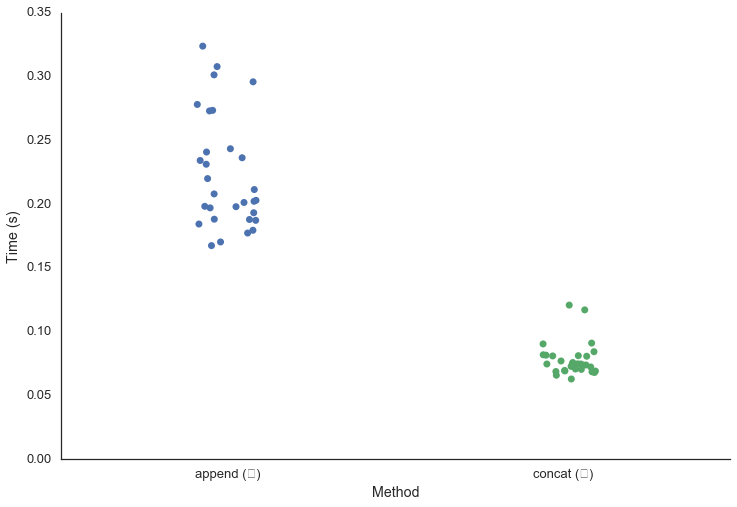

In [19]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Method', y='Time (s)',
              data=timings.stack().reset_index().rename(columns={0: 'Time (s)',
                                                                 'level_1': 'Method'}),
              jitter=True, size=7)
sns.despine()
plt.savefig('concat-append.svg', transparent=True)

That closes out part 1.